# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

Я являюсь аналитиком данных. Мне поручено провести анализ рынка недвижимости (квартир) в Санкт-Петербурге. 

## Описание данных

У меня есть доступ к данным сервиса Яндекс.Недвижимость — архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Датасет `data` включает в себя:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Цели исследования

Я должен провести анализ рынка недвижимости и ответить на такие вопросы:
1. Влияет ли время и дата размещения объявления на скорость продажи недвижимости?
2. Какие из параметров недвижимости (общая площадь, этаж, расстояние до центра города и др.) наиболее и наименее влияют на стоимость квартиры?
3. Какова средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?
4. Определить среднюю цену каждого километра по мере приближения к центру Санкт-Петербурга?


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('real_estate_data_apartments.csv', sep ='\t')
except:
    data = pd.read_scv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep ='\t')

In [3]:
display(data)
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограмму для каждого из параметров

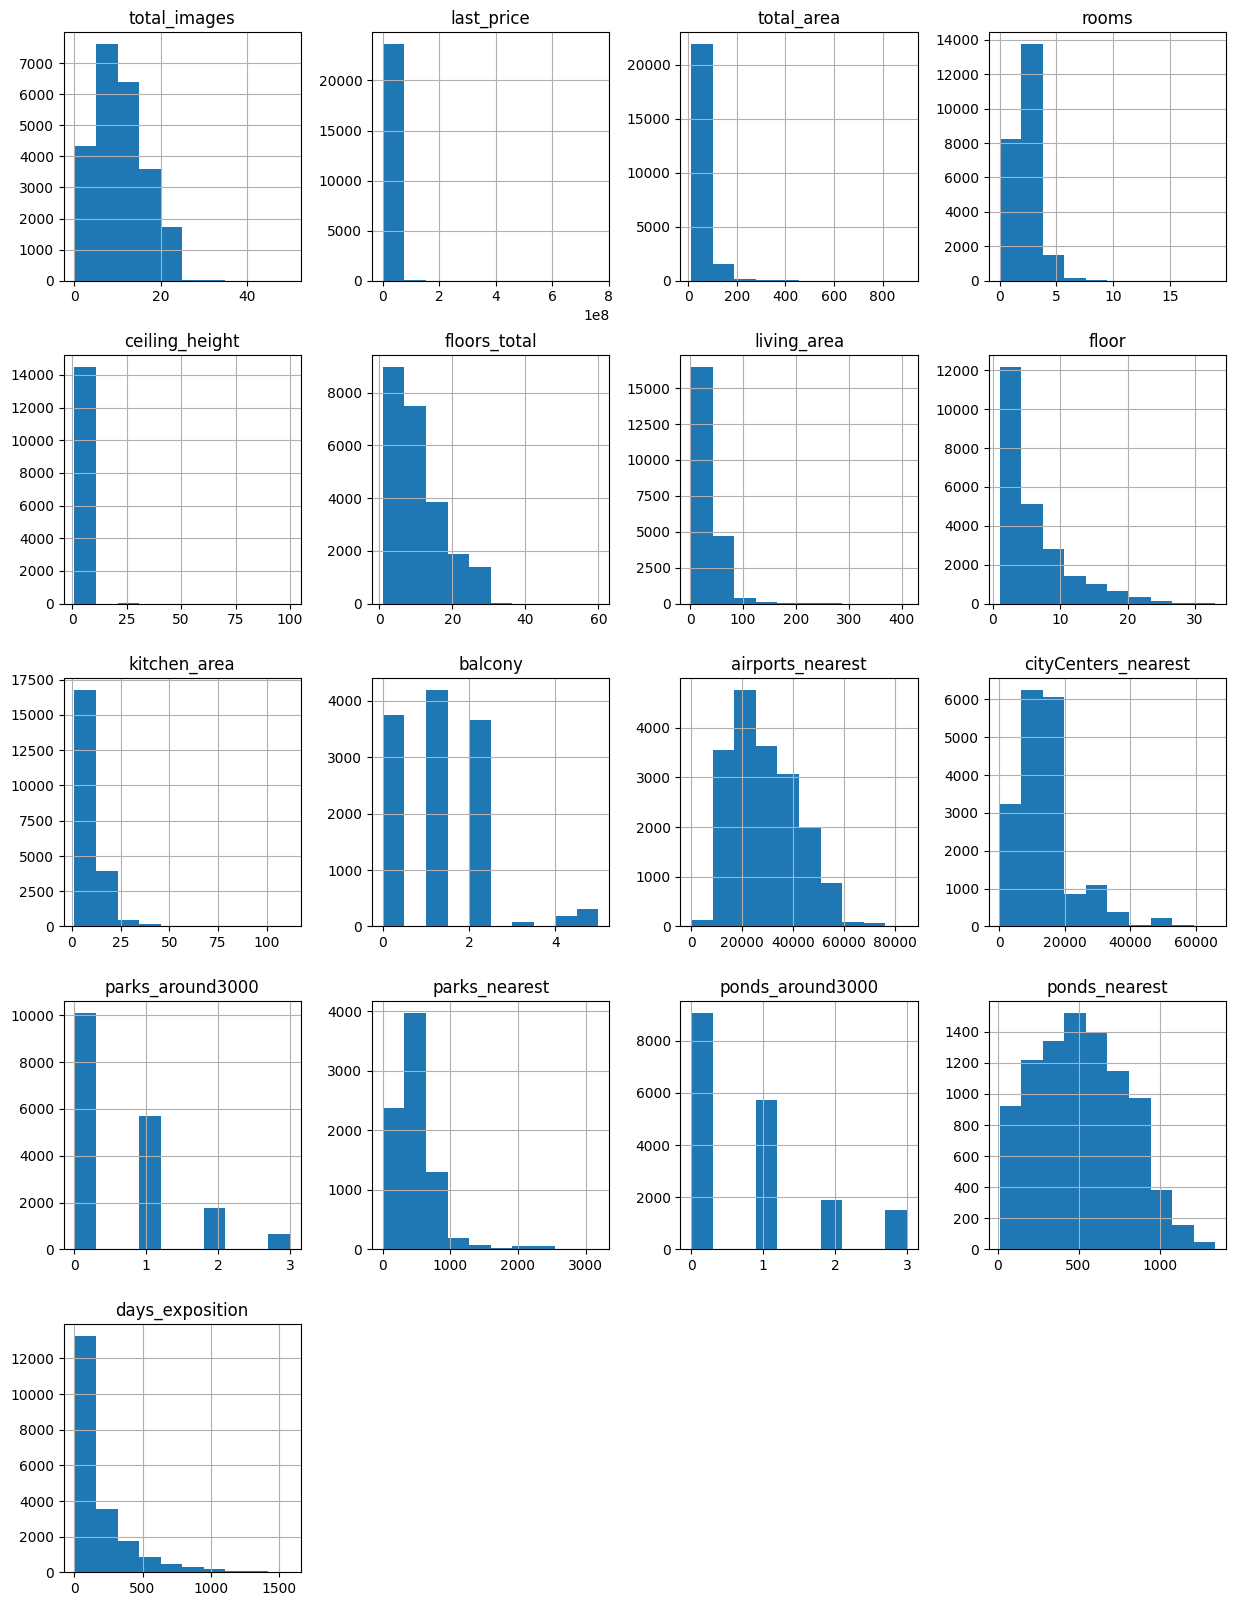

In [4]:
data.hist(figsize=(15, 20));

**Вывод**

В таблице есть пустые значения, особенно ярко можно увидеть в столбцах “Высота потолков”, “Апартаменты”, “Балкон”, “Парки недалеко” и “Водоемы недалеко”. Без подготовки датасета выполнение заказа будет ошибочным, необходимо заполнить пропуски или не брать их в анализ.



### Предобработка данных

Для начала выявим общее количество пропусков и их соотношение к общему число значений.

In [5]:
print(data.isna().sum())
print()
print(data.isna().mean().apply(lambda x: format(x, '.2%')))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images             0.00%
last_price               0.00%
total_area               0.00%
first_day_exposition     0.00%
rooms                    0.00%
ceiling_height          38.80%
floors_total             0.36%
living_area              8.03%
floor                    0.00%
is_apartment            88.29%
studio          

Сделаем сортировку столбцов с пропусками

In [6]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

skips_in_data.sort_values(ascending=False)

is_apartment           20924
parks_nearest          15620
ponds_nearest          14589
balcony                11519
ceiling_height          9195
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
ponds_around3000        5518
days_exposition         3181
kitchen_area            2278
living_area             1903
floors_total              86
locality_name             49
Name: nans, dtype: int64

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выведем первые гипотезы относительно пропусков:

1. Наибольшее количество пропусков в столбце “Апартаменты. Связываю это с тем, что не все люди знают о различиях между “Квартирой” и “Апартаментами”, так что продавцы могли просто не указать этот параметр в объявлениях. С другой стороны, нельзя отрицать и умысел, когда владелец недвижимости специально не указал этот параметр для увеличения привлекательности объекта. Необходимо провести дополнительные исследования.

2.” Расстояние до ближайшего парка” на втором месте. Вновь неоднозначный параметр, т.к. с одной стороны его могли расценить как неважным для указания, а с другой сознательно скрыть данный параметр т.к. большая удаленность от парка может снизить ценность квартиры для людей с детьми, животными или любителями прогулок.

*Предполагаю, что в подобных параметрах присутствует желание продавца сделать акцент на положительных чертах недвижимости и скрыть отрицательные. В тоже время значения в географических параметрах довольно схожи между собой, возможно существует ошибка в базе. Необходимо проверить гипотезу. * 

3. “Расстояние до ближайшего водоема” - аналогично с предыдущим пунктом. 

4.” Балконы” - в данном пункте однозначный вывод отсутствии значения в базе равно отсутствию балкона в квартире, т.к. его наличие повышает привлекательность и стоимость квартиры. Заменим пустые значения на отсутствие потолка. 

5.” Высота потолков” - считаю, что отсутствие значения означает то, что идут стандартные размеры. В случае если потолки выше среднего это будет указано, так как это повышает стоимость объекта. Можно предположить, что есть площади с очень низкими потолками, но предполагаю, что это единичные случаи в расчет брать их не буду. Используем средние значения для заполнения пропусков.

6.” Расстояние до ближайшего аэропорта” - опять же, географический параметр может быть необязательным и малоинтересным большинству покупателей. В случае если объект близко это обязательно укажут. Можно пренебречь.

7.” Расстояние до центра города” - аналогичная ситуация с географическими параметрами. Но в отличии от других имеет крайне важное значение для оценки стоимости квартиры. 

8.” Число водоемов в радиусе 3 км” - аналогично с парками и водоемами. Данный параметр не стоит заполнять или, при возникновении необходимости, указать как отсутствие водоемов поблизости.

9.” Число парков в радиусе 3 км” - аналогично с предыдущими пунктами, данный параметр не стоит заполнять или, при возникновении необходимости, указать как отсутствие парков поблизости.

10. “Сколько дней было размещено объявление (от публикации до снятия)” - скорее всего ошибка в базе, т.к. подобное обязательно фиксируется.  К тому же значений не так много - всего 13%. 

11.” Площадь кухни в квадратных метрах (м²)" - может происходить либо при очень маленьком размере кухни, либо если квартира-студия. Заполню пропуски средними значениями. 

12. "Жилая площадь в квадратных метрах (м²)” - крайне важный параметр, на мой взгляд. Отсутствие значений может быть либо, когда квартира студия и отделить размеры от кухни. Заполним в процессе выполнения проекта в зависимости от задач. 

13. "Всего этажей в доме" - крайне малое количество строк с пропусками, можно пренебречь. 

14. "Название населённого пункта" - аналогично предыдущему пункту. 




Выявим логику заполнения пропусков.

Как сказано выше есть однозначные параметры, такие как балкон - если их количество не указано, скорее всего их нет. Заменяем пропуск на "0".

Для начала вновь посмотрим на пропуски.


In [8]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

skips_in_data.sort_values(ascending=False)

is_apartment           20924
parks_nearest          15620
ponds_nearest          14589
balcony                11519
ceiling_height          9195
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
ponds_around3000        5518
days_exposition         3181
kitchen_area            2278
living_area             1903
floors_total              86
locality_name             49
Name: nans, dtype: int64

Для удобства каждый пункт будем разбирать по отдельности или группой 


In [9]:
print('Количество пропусков в столбце is_apartment:', data['is_apartment'].isna().sum())
data['is_apartment'].value_counts()

Количество пропусков в столбце is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

In [10]:
result = 50 / 23699 *100
print(f"Соотношение данных, которые отмечены как апартаменты к общему числу состовляет  {result:.2f}%")

Соотношение данных, которые отмечены как апартаменты к общему числу состовляет  0.21%



Воспользуемся сайтом https://spb.cian.ru/.

Используя фильтры выясняем, что на данный момент существует 5187 объявлений с типом "Апартаменты" на 86068 всего. 

*Можно было бы конечно воспользоваться и https://realty.ya.ru/, но в поиске я не нашел фильтр "Апартаменты"*



In [11]:
result2 = 5187 / 86068 *100
print(f"Соотношение данных, которые отмечены как апартаменты к общему числу, используя данные сайта, состовляет {result2:.2f}%")
result3 = result2/result
print(f"Количество объявлений с сайта больше чем в базе в {result3:.2f} раз ")

Соотношение данных, которые отмечены как апартаменты к общему числу, используя данные сайта, состовляет 6.03%
Количество объявлений с сайта больше чем в базе в 28.57 раз 


Данные вычисления подтверждают, что данные не соответствуют действительности. Однако по какому принципу заполнять данный столбец не ясно, скорее всего здесь бы, при работе с заказчиком, я бы обратился к нему для уточнения вопроса. В данном проекте оставлю этот параметр без изменений.

Теперь возьмем группу параметров, которые связаны с расстоянием.



In [12]:
display('Количество пропусков в столбце "расстояние до аэропорта":', data['airports_nearest'].isna().sum())
data['airports_nearest'].value_counts()

display('Количество пропусков в столбце "расстояние до центра":', data['cityCenters_nearest'].isna().sum())
data['cityCenters_nearest'].value_counts()

display('Количество пропусков в столбце "расстояние до ближайших прудов":', data['ponds_around3000'].isna().sum())
data['ponds_around3000'].value_counts() 

display('Количество пропусков в столбце "расстояние до ближайшего парка":', data['parks_around3000'].isna().sum())
data['parks_around3000'].value_counts()

'Количество пропусков в столбце "расстояние до аэропорта":'

5542

'Количество пропусков в столбце "расстояние до центра":'

5519

'Количество пропусков в столбце "расстояние до ближайших прудов":'

5518

'Количество пропусков в столбце "расстояние до ближайшего парка":'

5518

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Количество строк крайне схожо или полностью идентично. Предполагаю, что это одинаковые строки. 

In [13]:
four_columns_with_nan = ('пропуски в airports_nearest, в cityCenters_nearest, ponds_around3000 и parks_around3000 в {} строках'.
      format(data.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest and ponds_around3000 != ponds_around3000 and parks_around3000 != parks_around3000').shape[0]))

print(four_columns_with_nan)

пропуски в airports_nearest, в cityCenters_nearest, ponds_around3000 и parks_around3000 в 5518 строках


Значение количество пропусков в данной группе крайне схоже, к тому же они имеют сходство - данные параметры географические. Выдвигаю предположение, что это ошибка в выгрузке базы. Считаю, что пропуски необходимо заполнить по следующим параметрам - расстояниями до аэропорта, пруда или парка можно пренебречь, так как данный параметр не является ключевым.

В тоже время приближенность к центру города крайне сильно влияет на стоимость квартир.



In [14]:
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] == 0),'parks_nearest']=0
data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] == 0),'ponds_nearest']=0
data.loc[(data['parks_around3000'].isna()& (data['parks_nearest'].isna())),'parks_nearest']=0
data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'] == 0),'parks_around3000']=0
data.loc[(data['ponds_around3000'].isna() & (data['ponds_nearest'].isna())),'ponds_nearest']=0
data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'] == 0),'ponds_around3000']=0
data.loc[(data['airports_nearest'].isna() & (data['airports_nearest'].isna())),'airports_nearest']=0
data.loc[(data['airports_nearest'].isna()) & (data['airports_nearest'] == 0),'airports_nearest']=0

Еще раз осмотрим оставшиеся позиции.



In [15]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
skips_in_data.sort_values(ascending=False)

is_apartment           20924
balcony                11519
ceiling_height          9195
cityCenters_nearest     5519
days_exposition         3181
kitchen_area            2278
living_area             1903
floors_total              86
locality_name             49
Name: nans, dtype: int64

Значение в столбце "cityCenters_nearest" не буду трогать, так как параметр является важным для оценки квартиры и его некорректное заполнение может негативно сказаться на исследовании. 

*Я уточнил бы являются географические пропуски ошибкой базы. Если окажется, что это не ошибка, то стоит сделать вывести медиану в зависимости от населенного пункта *



Вернемся к балконам. Убежден, что при наличии балкона данная информация была бы указана, а значит заменяем пропуски на 0.

In [16]:
data['balcony'] = data['balcony'].fillna(value=0)

Теперь займемся потолками. Попытаемся отсечь значения, которые кардинально отличаются от средних значений. Как точку отсчета мы возьмем "сталинки" - высота в данных квартирах достигает четырех метров и это можно считать дорогим, но не слишком, жильем. 


In [17]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [18]:
print("Количество квартир с потолками выше 4 метров:", data[data['ceiling_height'] >= 4].count()[0])
print("Количество квартир с потолками выше 8 метров:", data[data['ceiling_height'] >= 8].count()[0])
print("Количество квартир с потолками выше 12 метров:", data[data['ceiling_height'] >= 12].count()[0])

Количество квартир с потолками выше 4 метров: 114
Количество квартир с потолками выше 8 метров: 29
Количество квартир с потолками выше 12 метров: 24


Существуют квартиры, в которых потолки выше 4 и даже 8 метров. Признаю, что есть элитные объекты недвижимости, где квартира может быть в несколько этажей и, как точка отсчета, используется высота от первого этажа до потолка второго и выше. Как таковое, данные позиции можно учитывать в расчетах, однако считаю, что данные значения будут считаться как вброс из-за радикально отличающейся стоимости. Делаю вывод, что данные объекты следует не учитывать в расчетах. 




In [19]:
data.drop(data.loc[data['ceiling_height'] > 4].index, inplace=True)

In [20]:
print("Количество квартир с потолками выше 8 метров:", data[data['ceiling_height'] >= 8].count()[0])

Количество квартир с потолками выше 8 метров: 0


In [21]:
print("Количество квартир с потолками ниже 2 метров:", data[data['ceiling_height'] <= 2].count()[0])

Количество квартир с потолками ниже 2 метров: 14


Считаю, что потолки ниже 2 метров - либо ошибочные значения, либо так же являются аномалиями. Уберем, так как их значение составляет 0,06% от общего числа строк. 

In [22]:
data.drop(data.loc[data['ceiling_height'] < 2].index, inplace=True)


Мы убрали аномальные значения, теперь займемся пропусками. 

In [23]:
data['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
3.98       1
3.83       1
3.87       1
3.44       1
3.59       1
Name: ceiling_height, Length: 144, dtype: int64

Подтверждается, что большинство квартир имеют высоту - 2.5 - 2.7 метра, заполним пропуски медианным значением.


In [24]:
data['ceiling_height'].median()


2.65

In [25]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [26]:
data['ceiling_height'].value_counts()

2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
3.98       1
3.83       1
3.87       1
3.44       1
3.59       1
Name: ceiling_height, Length: 144, dtype: int64

Считаю, что выбросив аномальные значения и заполнив пропуски по медиане, мы сделали данные актуальными. 

Вновь проверим пропуска. 

In [27]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
skips_in_data.sort_values(ascending=False)

is_apartment           20867
cityCenters_nearest     5504
days_exposition         3167
kitchen_area            2265
living_area             1897
floors_total              86
locality_name             49
Name: nans, dtype: int64

Займемся сроком объявления. Для начала слегка изменю формат строки. Делаем это для того, чтобы унифицировать все значения а также иметь возможность в дальнейшем проводить операции с ними без ошибок.

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


Заполним следующим способом. Выявим последнюю дату объявления

In [29]:
max_date = data["first_day_exposition"].max()
print(max_date) 

2019-05-03 00:00:00


Считаю, что на это момент был срез базы. Так как у всех объявлений есть данные о первом дне, то мы можем узнать срок между первым и последним значением.

In [30]:
data['days_exposition_delta'] = (max_date - data['first_day_exposition']).replace('days','')
data['days_exposition_delta'] = data['days_exposition_delta'].astype('str')
print(data['days_exposition_delta'])

0          57 days
1         150 days
2        1352 days
3        1379 days
4         318 days
           ...    
23694     773 days
23695     473 days
23696     446 days
23697     766 days
23698     651 days
Name: days_exposition_delta, Length: 23621, dtype: object


Напишем функцию, которая произведет замену пропусков. 

In [31]:
def get_rid_of_days(x):
    if 'days' in x['days_exposition_delta'] :
        category = x['days_exposition_delta'].replace('days','')
        return category
    else:
        category = 'ошибка в данных'
        return category

In [32]:
data['get_rid_of_days']=data.apply(get_rid_of_days, axis=1)

In [33]:
data.loc[(data['days_exposition'].isna()),'days_exposition']=data['get_rid_of_days']

In [34]:
data['days_exposition']=data['days_exposition'].astype('int')

In [35]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
skips_in_data.sort_values(ascending=False)

is_apartment           20867
cityCenters_nearest     5504
kitchen_area            2265
living_area             1897
floors_total              86
locality_name             49
Name: nans, dtype: int64

Теперь займемся группой "Площадь кухни" и "Жилая площадь". Ранее была выдвинуто предположение, что это квартиры студии. 

In [36]:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    195
living_area      14
dtype: int64

Мы выяснили, что количество квартир-студий крайне невелико от общего значения пропусков, однако их мы можем заполнить.

In [37]:
kitchen_area_ratio = data['kitchen_area'] / data['total_area']
living_area_ratio = data['living_area'] / data['total_area']
print(f"{kitchen_area_ratio.mean():.2f}%")
print(f"{living_area_ratio.mean():.2f}%")


0.19%
0.56%


In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_delta,get_rid_of_days
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,57 days,57
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,150 days,150
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,1352 days,1352
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,1379 days,1379
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,318 days,318


Мы выяснили средние значения на то, сколько занимает место кухня и жилая зона. Используем их.


In [39]:
data['kitchen_area'].fillna(kitchen_area_ratio* data['total_area'], inplace=True)
data['living_area'].fillna(living_area_ratio * data['total_area'], inplace=True)

In [40]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
skips_in_data.sort_values(ascending=False)

is_apartment           20867
cityCenters_nearest     5504
kitchen_area            2265
living_area             1897
floors_total              86
locality_name             49
Name: nans, dtype: int64

Займемся этажами в доме и названиями населенных пунктов. Их количество в соотношении к общему числу записей 0.36% и 0.20%, считаю, что можно пренебречь ими в исследовании

In [41]:
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])

In [42]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
skips_in_data.sort_values(ascending=False)

is_apartment           20748
cityCenters_nearest     5486
kitchen_area            2209
living_area             1859
Name: nans, dtype: int64

Однако, есть опасение неявных дубликатов в оставшихся строках. Посмотрим оставшиеся значения

In [43]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [44]:
print('Уникальных наименований в базе', len(data['locality_name'].unique()))
print('Уницификируем регистр')

Уникальных наименований в базе 363
Уницификируем регистр


In [45]:
data['locality_name'] = data['locality_name'].str.lower() 
print('Уникальных наименований в базе', len(data['locality_name'].unique()))
print('Заменим все буквы ё на е')

Уникальных наименований в базе 363
Заменим все буквы ё на е


In [46]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print('Уникальных наименований в базе', len(data['locality_name'].unique()))

Уникальных наименований в базе 329


После всех действий количество неявных дубликатов уменьшено почти 40. 

Вызовем информацию по датасету:

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23487 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23487 non-null  int64         
 1   last_price             23487 non-null  float64       
 2   total_area             23487 non-null  float64       
 3   first_day_exposition   23487 non-null  datetime64[ns]
 4   rooms                  23487 non-null  int64         
 5   ceiling_height         23487 non-null  float64       
 6   floors_total           23487 non-null  float64       
 7   living_area            21628 non-null  float64       
 8   floor                  23487 non-null  int64         
 9   is_apartment           2739 non-null   object        
 10  studio                 23487 non-null  bool          
 11  open_plan              23487 non-null  bool          
 12  kitchen_area           21278 non-null  float64       
 13  b

Не считая указанных выше параметров, пропуски заполнены

Теперь стоит отработать аномальные значения цены и жилой площади.

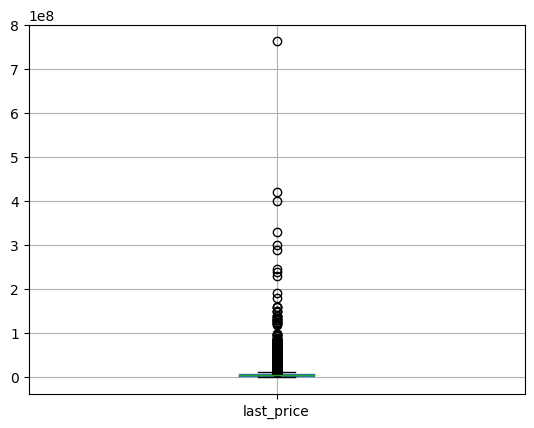

In [48]:
data.boxplot(['last_price']);

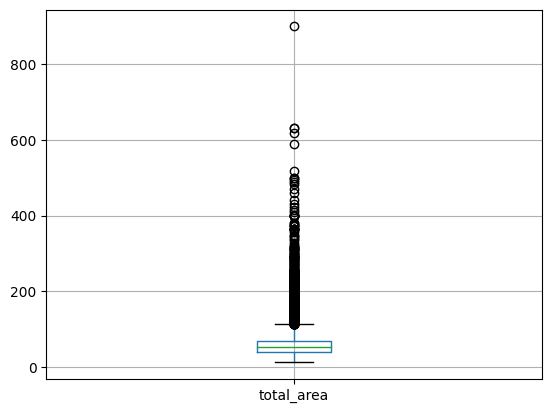

In [49]:
data.boxplot(['total_area']);

Как мы видим, в первом графике цены выбиваются от 4 миллионов, во тором от 600 метров. Уберем эти строки.

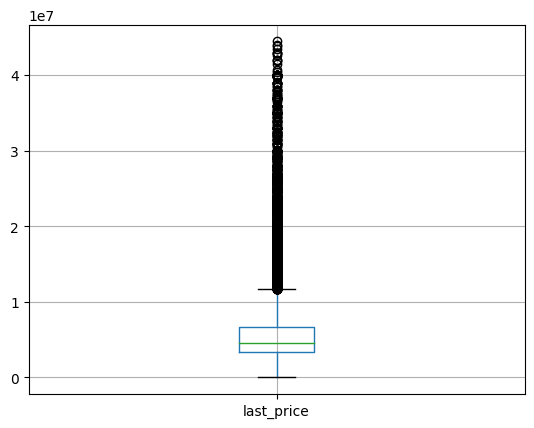

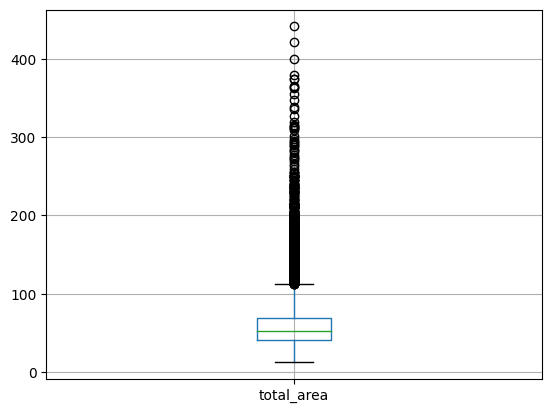

In [50]:
data.drop(data.loc[data['last_price'] >= 45000000].index, inplace=True)
data.drop(data.loc[data['total_area'] >= 450].index, inplace=True)

columns = ['last_price', 'total_area']
for column in columns:
    plt.figure()
    data.boxplot([column])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23330 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23330 non-null  int64         
 1   last_price             23330 non-null  float64       
 2   total_area             23330 non-null  float64       
 3   first_day_exposition   23330 non-null  datetime64[ns]
 4   rooms                  23330 non-null  int64         
 5   ceiling_height         23330 non-null  float64       
 6   floors_total           23330 non-null  float64       
 7   living_area            21491 non-null  float64       
 8   floor                  23330 non-null  int64         
 9   is_apartment           2718 non-null   object        
 10  studio                 23330 non-null  bool          
 11  open_plan              23330 non-null  bool          
 12  kitchen_area           21142 non-null  float64       
 13  b

In [52]:
old_data = pd.read_csv('real_estate_data_apartments.csv', sep ='\t')
data.shape[0] / old_data.shape[0]

0.9844297227731128

**Вывод**

По итогу можно сказать следующее:

1. Мы оставили нетронутыми столбцы с параметром "Апартаменты" и "Близость к центру", так как их некорректное заполнение может сильно исказить стоимость квартиры. К тому же убежден, что это ошибка базы и следует направить запрос к заказчику.

2. Оставшиеся четыре географических параметра указал как 0, т.к.  они не являются ключевыми при поиске квартиры.

3. Убрал аномально низкие или высокие строки в параметре "Высота потолков". Заполнил пропуски средним значением высоты потолков.

4. Заполнил пропуски в параметре "Срок объявления", используя разницу между последним зафиксированным объявлением (срез базы) и первым днем.

5. Ввиду малого количества строк в параметрах "Общее число этажей" и "Населенный пункт" убрал эти строки из исследования. 

6. Сделал поиск неявных дубликатов в параметре "Населенный пункт".

7. Убрал аномальные значений в цене и площади квартиры



### Посчитайте и добавьте в таблицу новые столбцы

Начнем добавлять столбцы в базу согласно чек-листу.

1. Цена одного квадратного метра

In [53]:
data['price_for_m2']=data['last_price']/data['total_area']
display(data.head(1))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_delta,get_rid_of_days,price_for_m2
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,57 days,57,120370.37037


2. День, месяц и год публикации

In [54]:
data['week_day']=data['first_day_exposition'].dt.day_name()
#data['week_day']=data['first_day_exposition'].dt.weekday() При необходимости отобразить параметр как цифру 
display(data.head(1))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_delta,get_rid_of_days,price_for_m2,week_day
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,57 days,57,120370.37037,Thursday


In [55]:
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year
display(data.head(1))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_delta,get_rid_of_days,price_for_m2,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,57 days,57,120370.37037,Thursday,3,2019


3. Добавим тип этажа для каждого объекта.

In [56]:
def floor_group(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'Первый этаж'
    if what_floor==total_floor:
        return 'Последний этаж'
    return 'Другой этаж'

floor_type=data.apply(floor_group,axis=1)
data['Floor_position']=floor_type
display(data.head(5))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_delta,get_rid_of_days,price_for_m2,week_day,month,year,Floor_position
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,57 days,57,120370.370370,Thursday,3,2019,Другой этаж
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,150 days,150,82920.792079,Tuesday,12,2018,Первый этаж
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,1352 days,1352,92785.714286,Thursday,8,2015,Другой этаж
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,318 days,318,100000.000000,Tuesday,6,2018,Другой этаж
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0.0,городской поселок янино-1,0.0,NaN,0.0,0.0,0.0,0.0,55,235 days,235,95065.789474,Monday,9,2018,Другой этаж


In [57]:
data['center_distance_km'] = data['cityCenters_nearest'] / 1000 
data['center_distance_km']= data['center_distance_km'].round()

In [58]:
display(data['center_distance_km'].sort_values(ascending=False).head(5))

9640     66.0
5340     66.0
577      66.0
5218     65.0
20746    65.0
Name: center_distance_km, dtype: float64

In [59]:
print(data['Floor_position']) 

0        Другой этаж
1        Первый этаж
2        Другой этаж
4        Другой этаж
5        Другой этаж
            ...     
23694    Другой этаж
23695    Другой этаж
23696    Первый этаж
23697    Другой этаж
23698    Первый этаж
Name: Floor_position, Length: 23330, dtype: object


**Вывод**

Мы добавили необходимые параметры для анализа стоимости квартиры. Можно приступать к исследованию базы.

### Проведите исследовательский анализ данных

Вновь построем гистограму для каждого из паретров

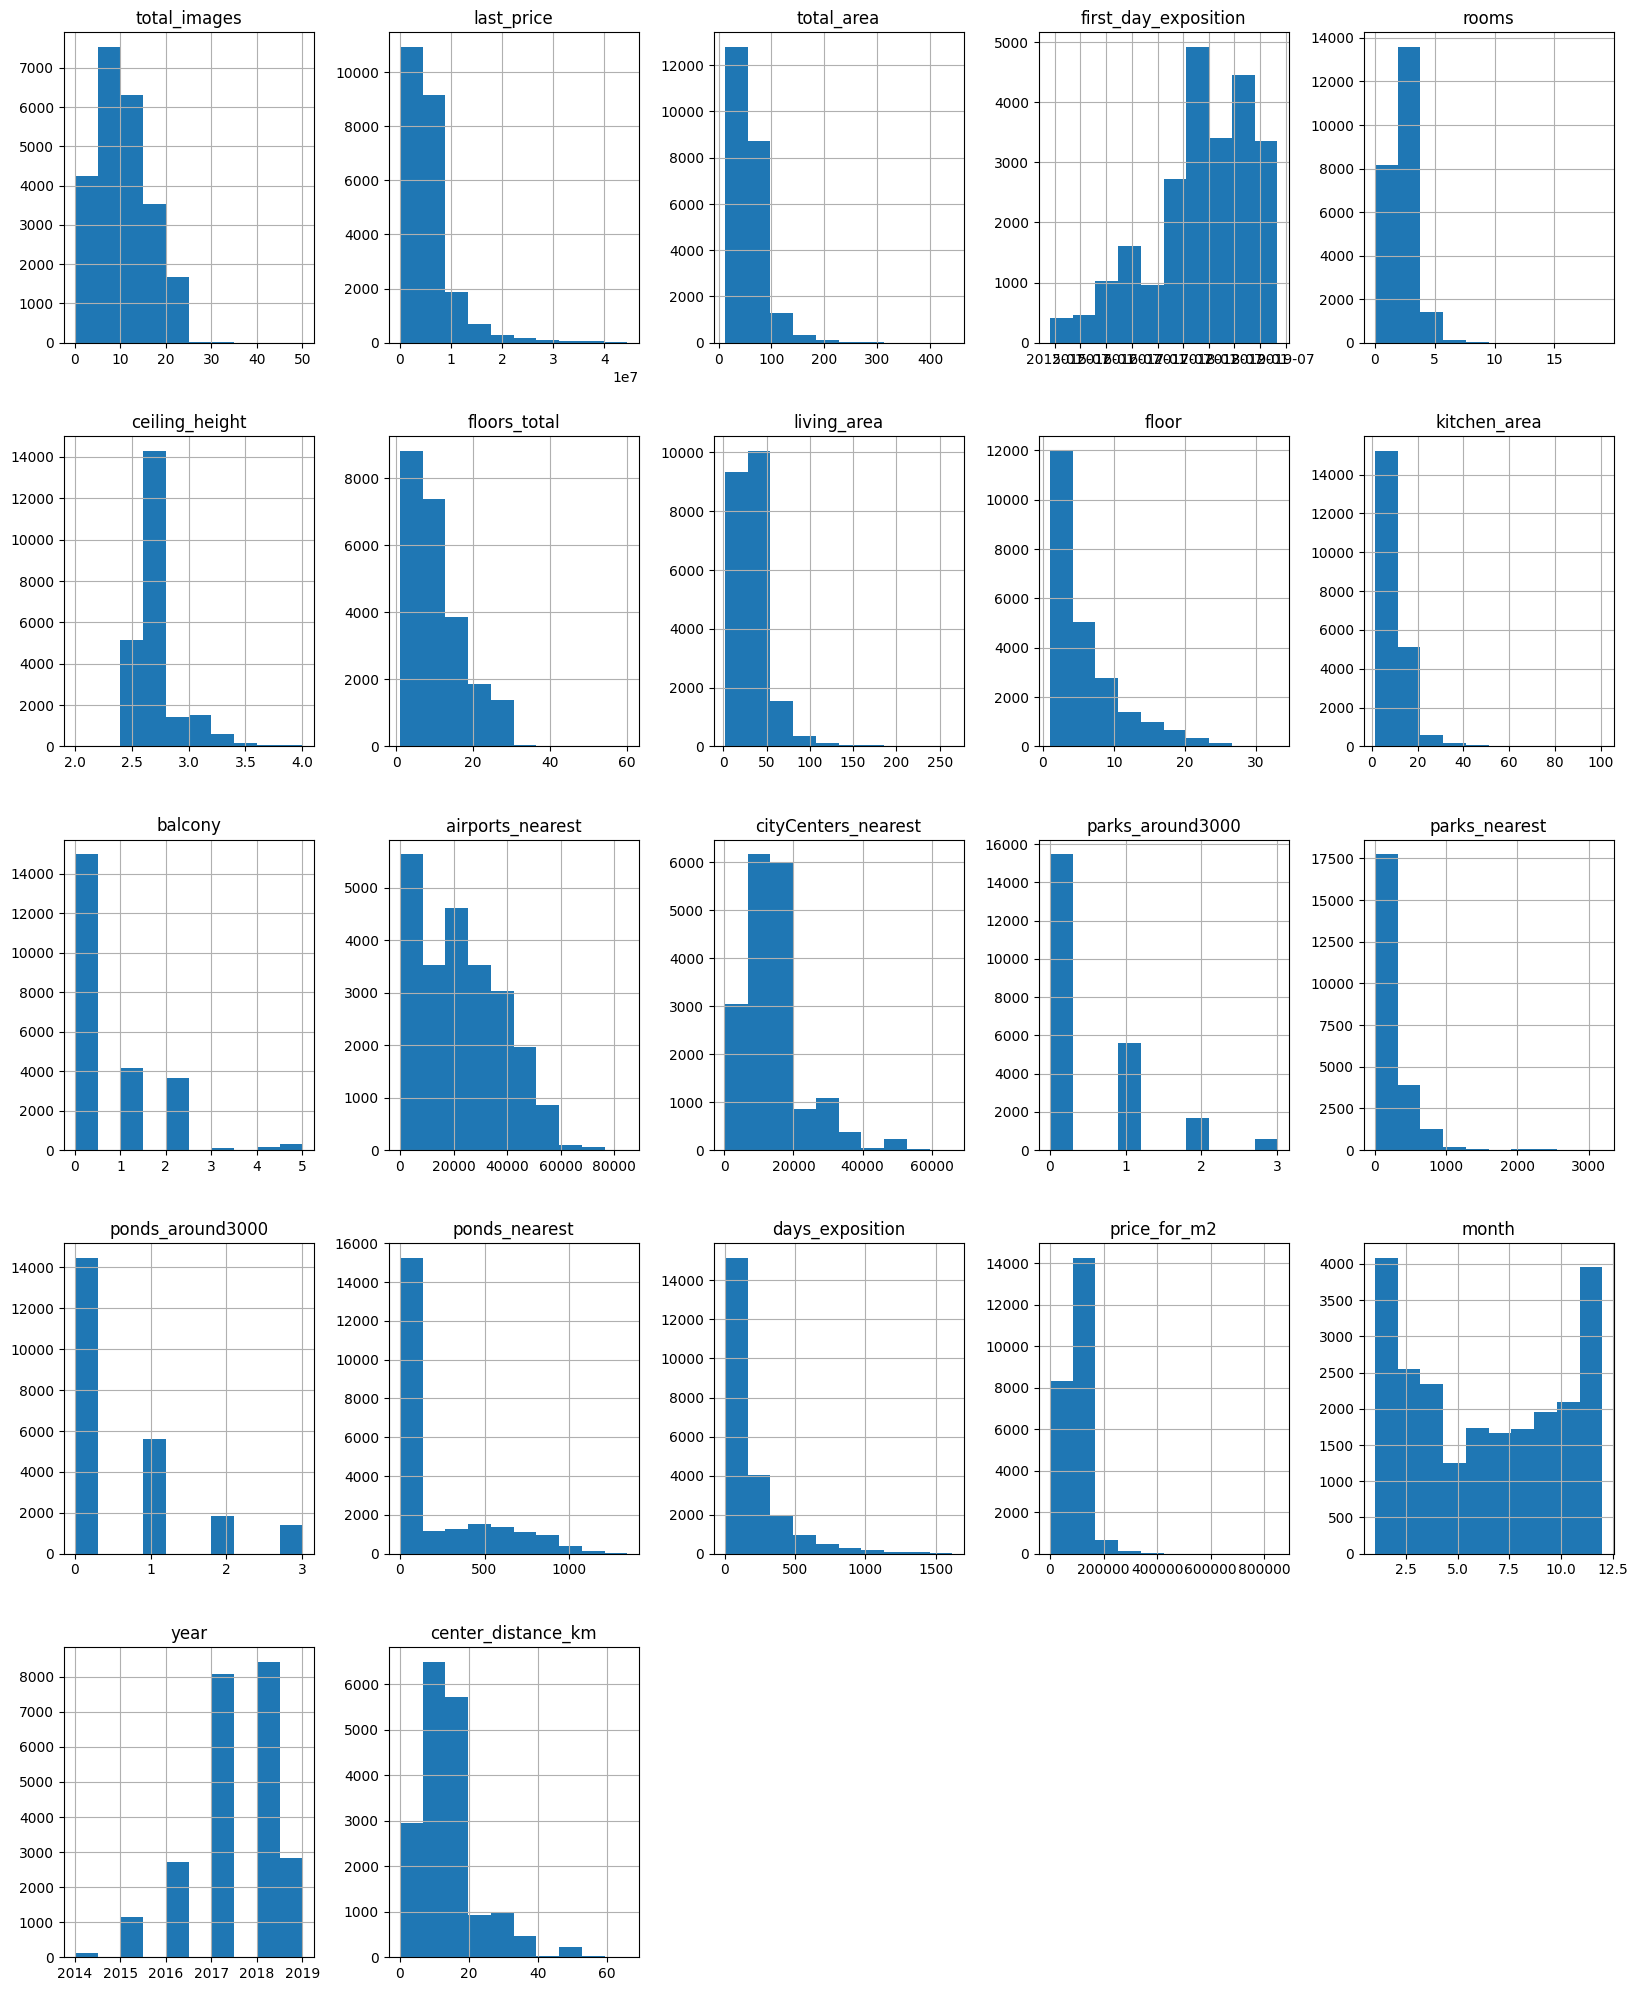

In [60]:
data.hist(figsize=(20, 25));

Изучим некотрые из них более подробно.

Первым пойдет общая площадь квартиры.

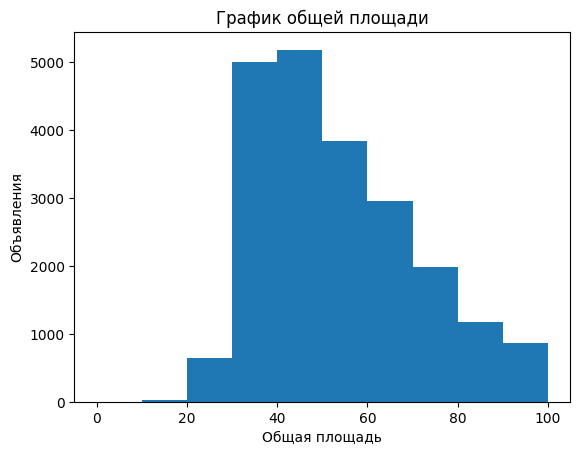

In [61]:
data['total_area'].plot(kind='hist', range=(0,100), title='График общей площади' )
plt.xlabel('Общая площадь')
plt.ylabel('Объявления');

Мы видим, что резкий подьем начинается с 30 кв. м. и спад после 45 кв. м. 

Изучим жилую площадь и площадь кухни.

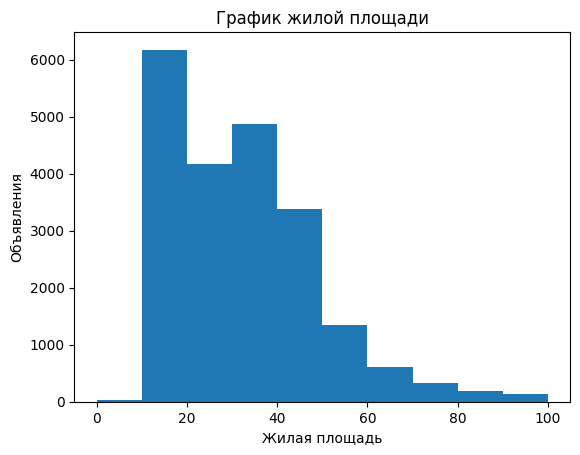

In [62]:
data['living_area'].plot(kind='hist', range=(0,100), title='График жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Объявления');


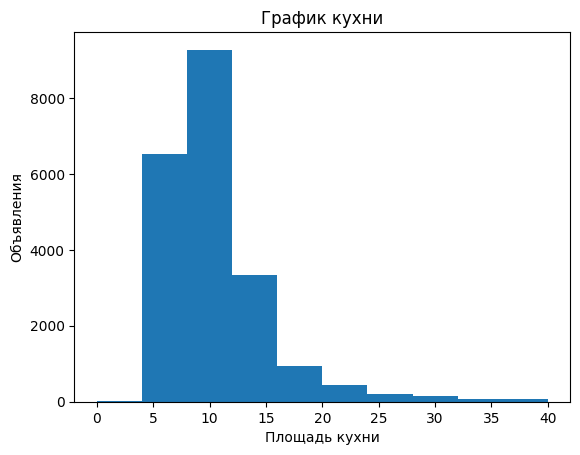

In [63]:
data['kitchen_area'].plot(kind='hist', range=(0,40), title='График кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Объявления');

In [64]:
display(data)
print(data['last_price'].value_counts())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_delta,get_rid_of_days,price_for_m2,week_day,month,year,Floor_position,center_distance_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,57 days,57,120370.370370,Thursday,3,2019,Другой этаж,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,150 days,150,82920.792079,Tuesday,12,2018,Первый этаж,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,1352 days,1352,92785.714286,Thursday,8,2015,Другой этаж,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,318 days,318,100000.000000,Tuesday,6,2018,Другой этаж,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.10,0.0,городской поселок янино-1,0.0,NaN,0.0,0.0,0.0,0.0,55,235 days,235,95065.789474,Monday,9,2018,Другой этаж,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,773,773 days,773,72490.845228,Tuesday,3,2017,Другой этаж,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,False,8.50,0.0,тосно,0.0,NaN,0.0,0.0,0.0,0.0,45,473 days,473,52542.372881,Monday,1,2018,Другой этаж,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,False,False,NaN,0.0,село рождествено,0.0,NaN,0.0,0.0,0.0,0.0,446,446 days,446,44091.710758,Sunday,2,2018,Первый этаж,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,766 days,766,149511.400651,Tuesday,3,2017,Другой этаж,10.0


4500000.0     341
3500000.0     289
4000000.0     259
4300000.0     259
4200000.0     258
             ... 
4072000.0       1
13310800.0      1
4213395.0       1
7253540.0       1
11475000.0      1
Name: last_price, Length: 2802, dtype: int64


Вцелом мы видим, что жилая площадь в большенстве составляет от 15 до 40 кв.м., а кухни от 5 до 10-12. Разумется прослеживатеся корреляция - чем больше общая площадь квартиры, тем больше и её зоны.

Займемся ценой объекта

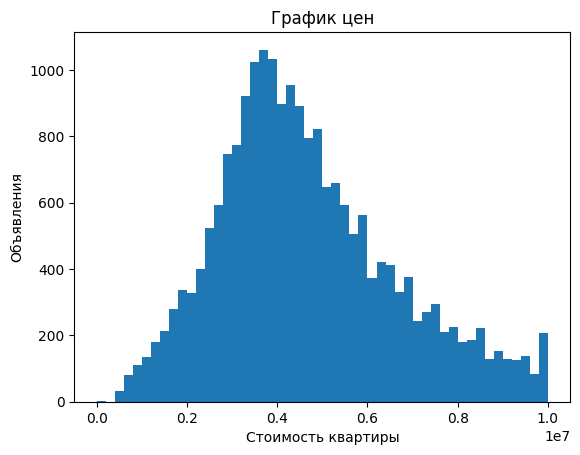

In [65]:
data['last_price'].plot(kind='hist', bins=50, range=(0, 10000000), title='График цен')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Объявления');


В среднем наиболее частая цена на квартиру составляет от 4 до 6 млн. рублей

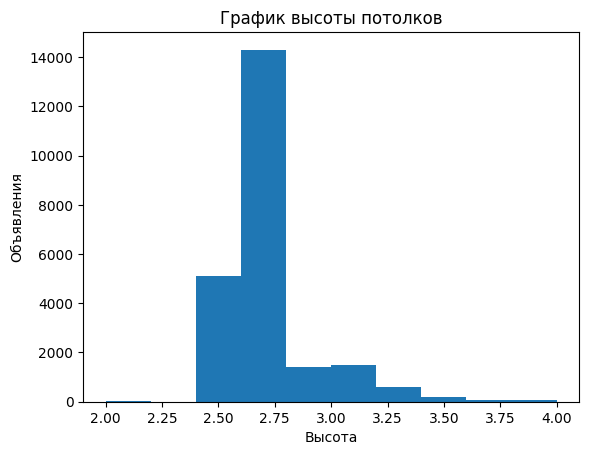

In [66]:
data['ceiling_height'].plot(kind='hist', range=(2,4), title='График высоты потолков')
plt.xlabel('Высота')
plt.ylabel('Объявления');

Высота потолков чаще всего идет выше 2,5 метров.

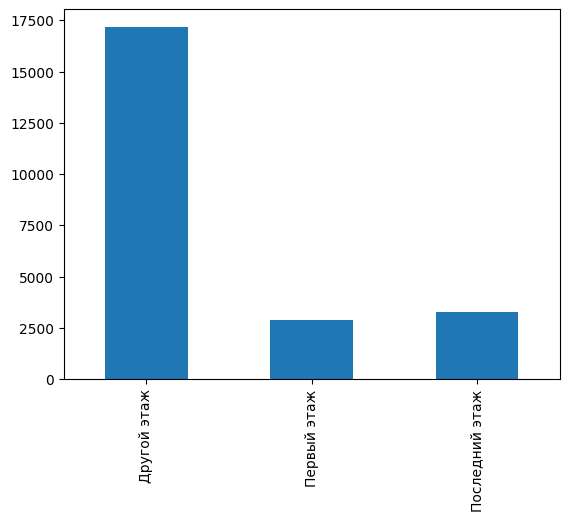

In [67]:
data['Floor_position'].value_counts().sort_index(ascending=True).plot.bar();

Вцелом сложно что-то сказать определенное, но большинство продаваемых квартир находятся не на первом и последнем этаже. 



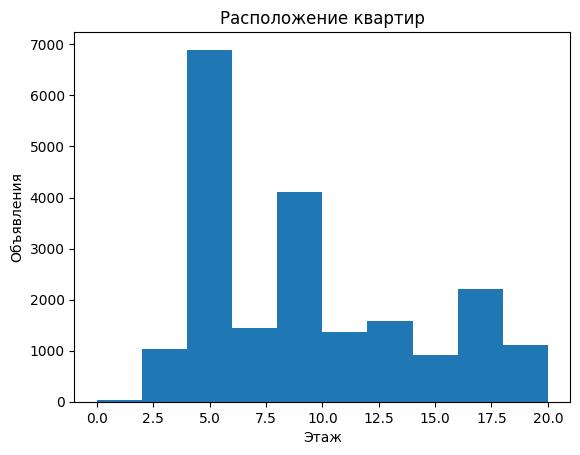

In [68]:
data['floors_total'].plot(kind='hist', range=(0,20), title='Расположение квартир')
plt.xlabel('Этаж')
plt.ylabel('Объявления');

Как было сказано выше, большая часть квартир  находятся между первым и последним этажом. 


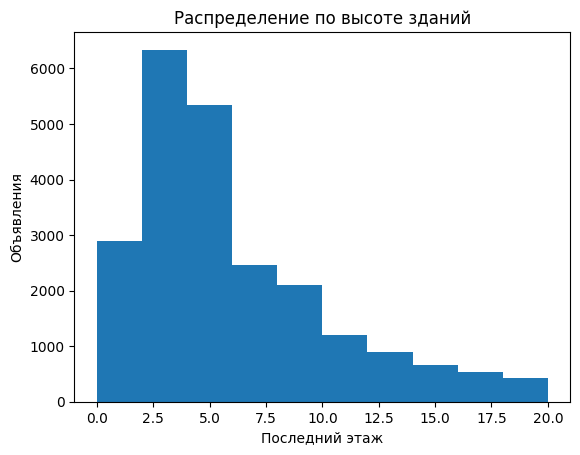

In [69]:
data['floor'].plot(kind='hist', range=(0,20), title='Распределение по высоте зданий')
plt.xlabel('Последний этаж')
plt.ylabel('Объявления');

Наибольший массив данных мы видим в четырех и пятиэтажных домах. Если бы спуск был плавным, я бы мог предположить, что дело в годе стройки, ведь со времени технологии строительства улучшались, что позволяло возводить более высокие дома. Но ввиду того, что в нашей базе присутствуют не только Санкт-Петербург, связываю это с тем, что в других населенных пунктах могут просто отсутствовать или иметь крайне малое количество высотки.


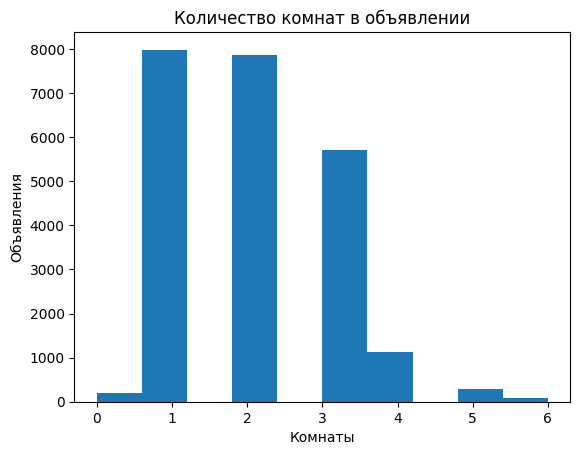

In [70]:
data['rooms'].plot(kind='hist', range=(0,6), title = "Количество комнат в объявлении")
plt.xlabel('Комнаты')
plt.ylabel('Объявления');

Наиболее популярны квартиры с 1, 2 и 3 комнатами. К тому же мы выяснили, что студии практически так же редки, как и пятикомнатные и более квартиры. Предположу, если квартиры с более чем четырьмя комнатами по-своему являются элитным жильем, а студии как таковое не так давно появились на рынке недвижимости.

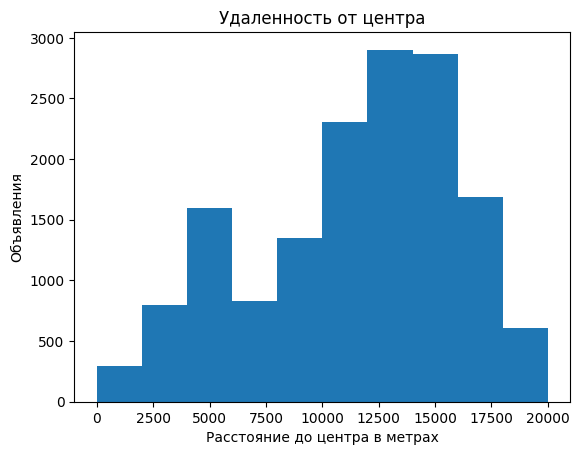

In [71]:
data['cityCenters_nearest'].plot(kind='hist', range=(0,20000), title = "Удаленность от центра")
plt.xlabel('Расстояние до центра в метрах')
plt.ylabel('Объявления');

Наибольшее количество квартир находится в пределах 10-16 км.

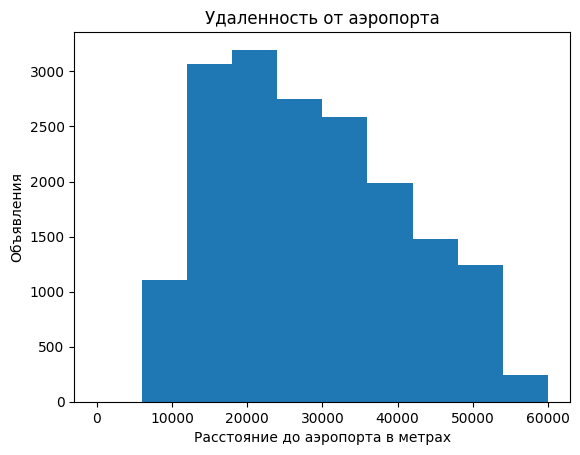

In [72]:
data['airports_nearest'].plot(kind='hist', range=(1,60000), title = "Удаленность от аэропорта")
plt.xlabel('Расстояние до аэропорта в метрах')
plt.ylabel('Объявления');

Помним, что географические пропуски мы  выявили как ошибочные и заполнили 0. Мы видим, что большая часть квартир находится от 10 км от аэропорта


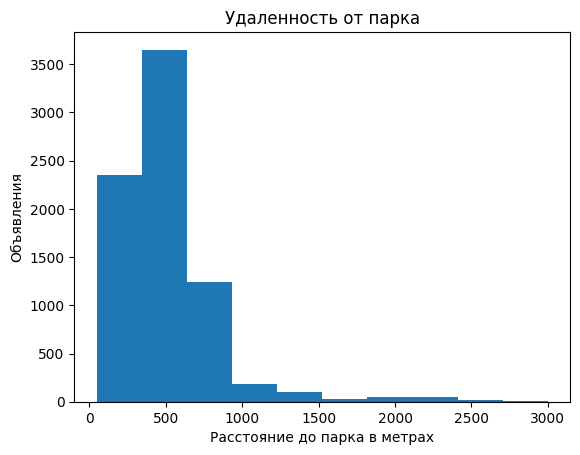

In [73]:
data['parks_nearest'].plot(kind='hist', range=(50,3000), title ="Удаленность от парка")
plt.xlabel('Расстояние до парка в метрах')
plt.ylabel('Объявления');

Большая часть объектов имеет в шаговой доступности парки.

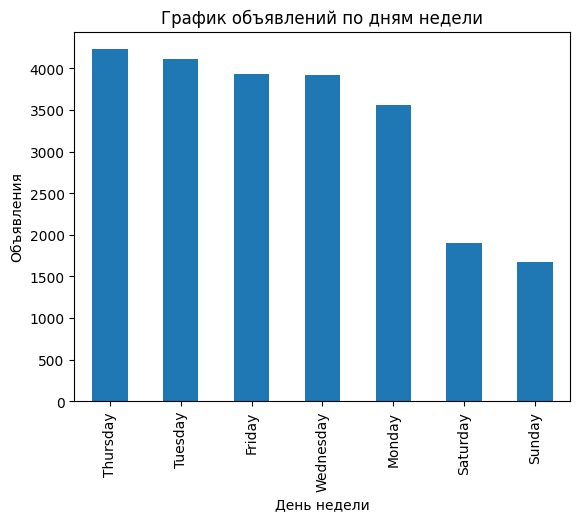

In [74]:
data['week_day'].value_counts().plot.bar(title ="График объявлений по дням недели")
plt.xlabel('День недели')
plt.ylabel('Объявления');

Большая часть объявлений сделано в будние дни. Связываю это с деятельностью риэлтерских агентств.

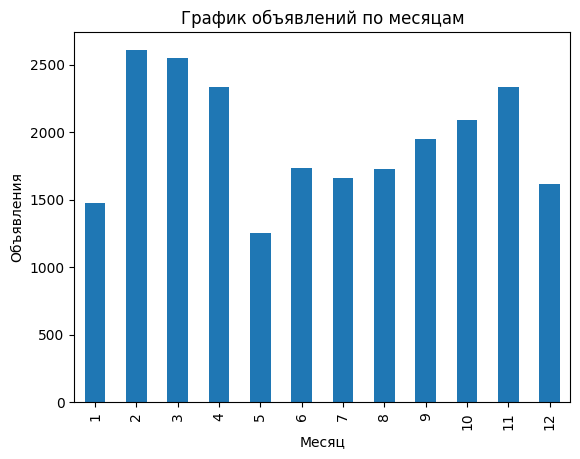

In [75]:
data['month'].value_counts().sort_index(ascending=True).plot.bar(title ="График объявлений по месяцам")
plt.xlabel('Месяц')
plt.ylabel('Объявления');

Мы видим, что к после нового года идет резкий подъем количества объявлений, к лету он затухает, что связываю с майскими праздниками и сезоном отпусков, затем идет постепенный рост, который имеет резкий спад к зиме. 

Можно сказать, что наиболее быстрые продажи можно считать до 1 месяца, а наиболее долгие после 3. При этом хорошо начать выставлять объявление либо в конце января, ориентируясь на высокий спрос, либо в к середине мая, когда конкуренция еще недостаточно велика, но спрос начинает появляться. 

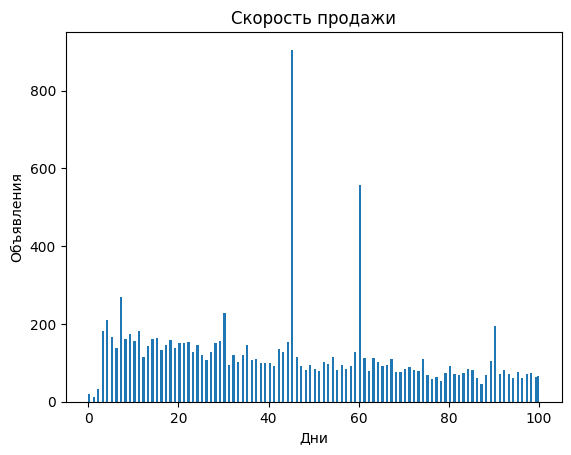

In [76]:
data['days_exposition'].plot(kind='hist', bins = 200,  range=(0,100), title ="Скорость продажи")
plt.xlabel('Дни')
plt.ylabel('Объявления');

In [77]:
time_for_sale=data.query('days_exposition < 200')
time_for_sale['days_exposition'].agg(['mean','median'])

mean      71.000181
median    59.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются около 2 месяцев. Из выборки я убрал аномальные значения, так как нестандартные по планировке, размерам или состоянию квартиры могут продаваться крайне долгий срок.

0.7884138222338793


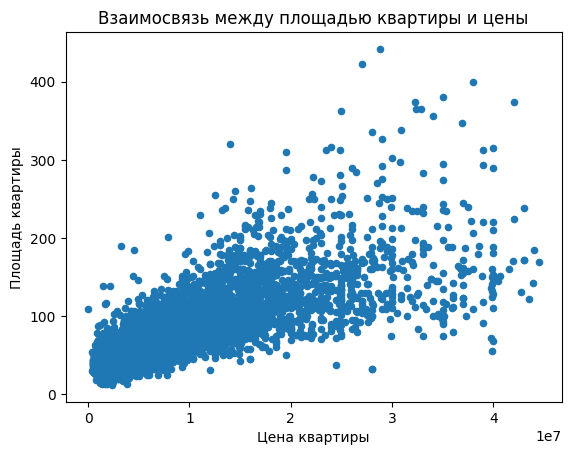

In [78]:
print(data['last_price'].corr(data['total_area']))
data.plot(x='last_price', y='total_area', kind='scatter', title="Взаимосвязь между площадью квартиры и цены")
plt.xlabel('Цена квартиры')
plt.ylabel('Площадь квартиры')
plt.show()


Чем больше площадь квартиры, тем выше цена.

0.6940611767526653


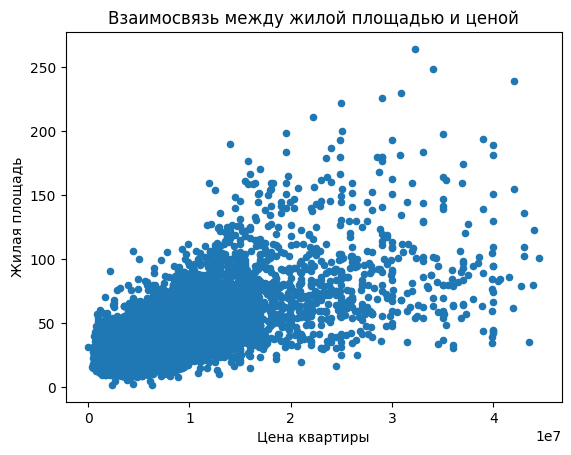

In [79]:
print(data['last_price'].corr(data['living_area']))
data.plot(x='last_price', y='living_area', kind='scatter', title="Взаимосвязь между жилой площадью и ценой")
plt.xlabel('Цена квартиры')
plt.ylabel('Жилая площадь')
plt.show()


Аналогичная ситуация с жилой площадью, ведь она занимает большую часть квартиры

0.6043666890694018


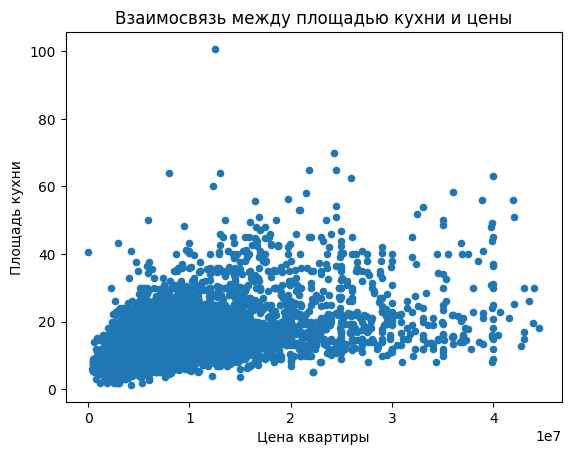

In [80]:
print(data['last_price'].corr(data['kitchen_area']))
data.plot(x='last_price', y='kitchen_area', kind='scatter', title="Взаимосвязь между площадью кухни и цены")
plt.xlabel('Цена квартиры')
plt.ylabel('Площадь кухни')
plt.show()


В целом параметры практически идентичны. Это логично, так как чем больше общая площадь квартиры, тем больше в ней зоны, а площадь квартиры влияет на её стоимость.

0.5163850039805372


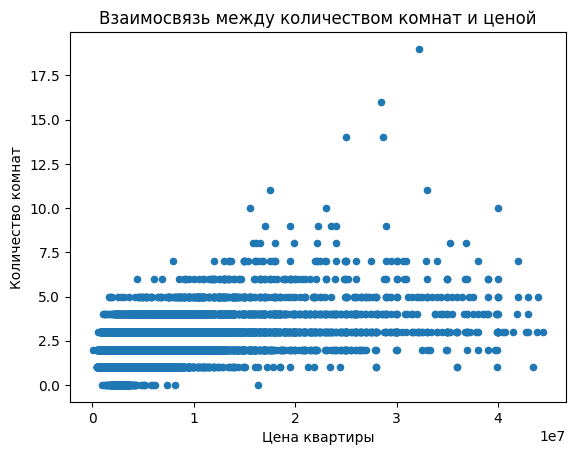

In [81]:
print(data['last_price'].corr(data['rooms']))
data.plot(x='last_price', y='rooms', kind='scatter', title="Взаимосвязь между количеством комнат и ценой")
plt.xlabel('Цена квартиры')
plt.ylabel('Количество комнат')
plt.show()


Так же есть и логичная связь между количеством комнат и ценой. Однако замечу, что она чуть меньше. Связываю это с тем, что большое количество комнат не всегда связано с большим размером квартиры.

,mean,count,median
Floor_position,,,
Другой этаж,6.172083e+06,17170,4800000.0
Первый этаж,4.616467e+06,2894,3900000.0
Последний этаж,5.756298e+06,3266,4300000.0


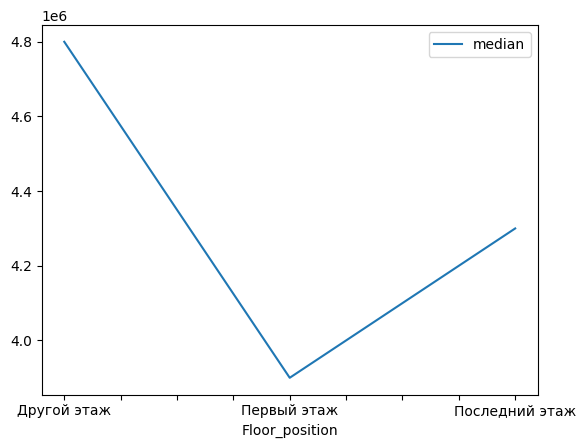

In [82]:
category = data.pivot_table(index = 'Floor_position', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
category.columns = ['mean', 'count', 'median']
category.plot(y = 'median', legend=True)
category

Дешевле всего первый этаж, наиболее дорогие находятся по средине дома. 

,mean,median
week_day,,
Friday,5.771598e+06,4550000.0
Monday,5.956790e+06,4600000.0
Saturday,5.715415e+06,4500000.0
Sunday,5.792556e+06,4500000.0
Thursday,6.119953e+06,4600000.0
Tuesday,5.870273e+06,4700000.0
Wednesday,6.031049e+06,4690000.0


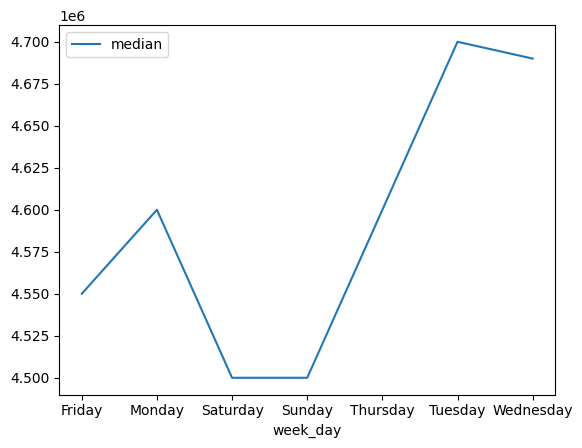

In [83]:
category2 = data.pivot_table(index = 'week_day', values = 'last_price', aggfunc = ['mean', 'median'])
category2.columns = ['mean', 'median']
category2.plot(y = 'median', legend=True)
category2

Подтверждая предыдущий вывод, в субботу и воскресенье риелторы работают меньше.

,mean,median
month,,
1,6.006039e+06,4600000.0
2,5.921115e+06,4644000.0
3,5.874448e+06,4650000.0
4,5.928038e+06,4794500.0
5,5.904306e+06,4500000.0
6,5.767243e+06,4400000.0
7,5.844175e+06,4600000.0
8,5.964803e+06,4550000.0
9,6.023151e+06,4690000.0


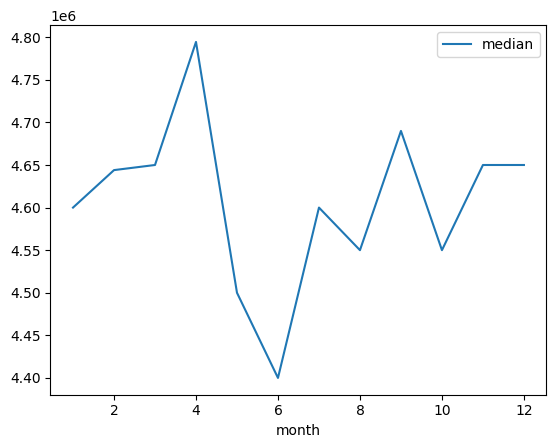

In [84]:
category3 = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'median'])
category3.columns = ['mean', 'median']
category3.plot(y = 'median', legend=True)
category3

Лето наиболее слабый сезон продаж, думаю это связано с отпусками.

,mean,median
year,,
2014,9.950280e+06,7488280.0
2015,7.018787e+06,5250000.0
2016,5.951535e+06,4500000.0
2017,5.846169e+06,4500000.0
2018,5.666763e+06,4550000.0
2019,6.233556e+06,5000000.0


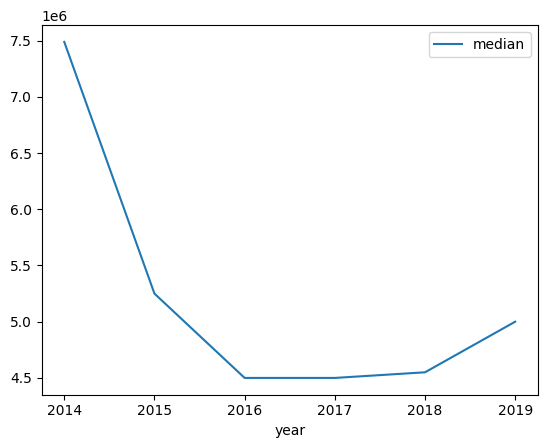

In [85]:
category4 = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'median'])
category4.columns = ['mean', 'median']
category4.plot(y = 'median', legend=True)
category4

Как можно заметить с 14 года началось резкое спадание, скорее всего это связано с политическими событиями в стране. Постепенно, после 16 года цена стала выравниваться, а к 19 начала расти

In [ ]:
plt.bar(data['month'], data['last_price']);

В отличии от дней в течении года есть определенная закономерность. Так мы видим, что наиболее выгодные месяца для продажи квартиры сентябрь, декабрь и февраль.

Просмотрим взаимосвязь между населенным пунктом и стоимостью.

In [ ]:
top_10_local = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_10_local.columns=['number_of_ads']
top_10_local

Мы выделили 10 населенных пунктов с наибольшем количеством объявлений. Лидирует, разумеется Санкт-Петербург, по остальным городам количество меняется не столь резко.

In [ ]:
top_10_local['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='price_for_m2', aggfunc='mean')
top_10_local_price=top_10_local.style.format({'cost_per_meter_mean':'{:.2f} ₽'})

Обозначим наиболее высокую и низкую стоимость жилья в топе.

In [ ]:
top_10_local_price.highlight_max(color='green', subset='cost_per_meter_mean').highlight_min(color='red', subset='cost_per_meter_mean')

Можно сделать вывод, что стоимость жилья не зависит от количества объявлений в населенном пункте. Больше влияния будут оказывать другие факторы, такие как размер локации, качество жилья, местонахождение и т.п.

Определим связь между расположением недвижимости в Санкт-Петербурге.


In [ ]:
spb_price_center = data.loc[data['locality_name'] == 'санкт-петербург']
spb_price_center['center_distance_km'].isna().sum()

Вряд ли даже в Санкт-Петербурге центр города больше 20 км. Немного сократим выборку

In [ ]:
spb_price_center = spb_price_center.loc[spb_price_center['center_distance_km'] < 20]

In [ ]:
spb_price_center.info()

In [ ]:
mean_cost_per_km = spb_price_center['last_price'].sum()/spb_price_center['center_distance_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_cost_per_km))

In [ ]:
spb_price_center.pivot_table(index='center_distance_km', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3,)
plt.xlabel('КМ')
plt.ylabel('Цена')
plt.show()

**Вывод**

Из нашего небольшого исследования можно сказать, что цена за каждый км изменяется где-то на 639397 руб. При этом идет резкое понижение цены после где-то 7,5 км от центра города. 

Если подводить итог, можно сказать, что взаимосвязь между каждым из параметров с ценой определенно есть. Но если где-то зависимость будет сильной, например размер жилплощади, то часть из них практически не влияет на цену - день размещения объявления. 



### Общий вывод

Итак, подводя итог исследованию можно сказать следующее:

**I
Ознакомление с базой**
                                                
После получения базы от заказчика и ознакомления с ней можно сказать следующее - у нас есть достаточное число как объявлений о продаже, так различных параметров для выявления взаимосвязей между ними и ценой.

**II 
Предобработка данных**
                                                
Перед началом работы вы выяснили о большом количестве пропусков в базе. Некоторые из них, такие как "апартаменты" или "балкон", можно считать умышленными при создании объявления. Другие, такие как географические параметры вряд ли, так как их значения в столбцах слишком похожи друг на друга. Так же мы убрали некоторые аномальные значения, такие как размер квартир или высокая цена, которые могли повлиять на анализ.

Однако в целом база была заполнена достаточным количеством информации, чтобы заполнить их и начать анализировать данные. И все же замечу, что после ознакомления с базой, при работе с клиентом, стоит уточнить - есть ли отсутствующие данные у него и если да, запросить их.

В любом случае, нам удалось заполнить большую часть пропусков средними значениями и по медиане.


**III
Добавление новых столбцов**

После обработки базы было принято решение о выявлении новых столбцов-характеристик, которые скорее являлись более глубокими значениями изначальной информации, такие как цена не за всю квартиру, а за 1 кв. м. Разумеется, можно было бы создавать эти столбцы и в процессе анализа данных по мере необходимости, однако используемый подход позволяет более структурировано подойти к работе, без лишней импровизации и опасений о том, что нечто будет не учтено в процессе анализа.

**IV
Анализ данных**

После изучения графиков и таблиц, мы выяснили как меняется цена квартиры в зависимости от её размера, количества комнат, удаленности и т.п. 
Некоторые выводы были ожидаемы, например говоря об общей площади квартиры. С другой стороны я был удивлен тому, что в выходные дни сделок по продажам квартир меньше.

Как итог можно сказать, что большая часть квартир предпочитает 1-2 комнатные квартиры в высоких зданиях, в населенных пунктах - города и пригороды. Разумеется, лидером по количеству объявлений является Санкт-Петербург.  Средняя цена составляет 100 т. р. за кв. м., а высота потолков в квартире до 3 метров. 

